In [39]:
#1.Read 2 arrays x,y containing floating point value
import tensorflow as tf

x=tf.constant([1.0,2.0,3.0,4.0])
y=tf.constant([2.0,5.0,4.0,5.0])
sum1=tf.constant(0.0)
m=tf.constant(0.0)

# 2.mean of x and y
with tf.Session() as sess:
    with tf.name_scope("Mean_X"):
        mean_x=tf.reduce_mean(x)
    with tf.name_scope("Mean_Y"):
        mean_y=tf.reduce_mean(y)

    n=tf.to_float(len(sess.run(x)))
# 3.variance(x)=sum((x-mean(x))^2)/n
    with tf.name_scope("Variance_X"):
        for i in range(len(sess.run(x))):
            sum1=tf.add(sum1,tf.square(tf.subtract(x[i],mean_x)))
    
    
        var_x=tf.div(sum1,n)
            
# 4.covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))/n-1        
    sum1=0.0
    with tf.name_scope("Covariance"):
        for i in range(len(sess.run(x))):
            sum1=tf.add(sum1,tf.multiply(tf.subtract(x[i],mean_x),tf.subtract(y[i],mean_y)))
        
        
        cov_xy=tf.div(sum1,tf.subtract(n,1.0))
            
# 5.m=covariance(x,y)/variance(x)         
    with tf.name_scope("Value_m"):
        m = tf.div(cov_xy,var_x)

# 6.c=mean(y)-m*mean(x)
    with tf.name_scope("Value_c"):
        c=tf.subtract(mean_y,tf.multiply(m,mean_x))
        
# y = mx+c
    with tf.name_scope("Linear_Model"):
        y1=tf.add(tf.multiply(m,x),c)
    

    print("Mean of x: ",sess.run(mean_x))
    print("Mean of y: ",sess.run(mean_y))
    print("Variance of x: ",sess.run(var_x))
    print("covariance(x,y): ",sess.run(cov_xy))
    print("Value of m: ",sess.run(m))
    print("Value of c: ",sess.run(c))
    
    print("Value of y1: ",sess.run(y1))

Mean of x:  2.5
Mean of y:  4.0
Variance of x:  1.25
covariance(x,y):  1.33333
Value of m:  1.06667
Value of c:  1.33333
Value of y1:  [ 2.4000001   3.4666667   4.53333378  5.60000038]


Value of y:  [ 2.  5.  4.  5.]
Value of y1:  [ 2.4000001   3.4666667   4.53333378  5.60000038]


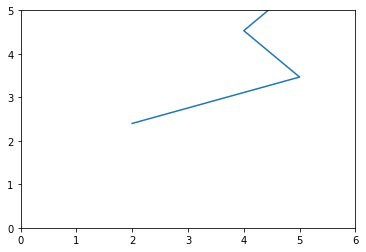

Root mean square error: 0.888194


In [41]:
# Part 2

import matplotlib.pyplot  as plt

val1=tf.constant(0.0)
err1=tf.constant(0.0)

with tf.Session() as sess:
    print("Value of y: ",sess.run(y))
    print("Value of y1: ",sess.run(y1))


    plt.plot(sess.run(y),sess.run(y1))
    plt.axis([0,6,0,5])
    plt.show()


# RMSE = sqrt(mean((y-y_pred).^2))


    cost = tf.reduce_sum(tf.pow(y1-y, 2))/(len(sess.run(x)))
    cost = tf.sqrt(cost)
               
    print("Root mean square error:",sess.run(cost))
